


## Introduction et objectifs
La ville est modelisé par une graph planaire, non orienté, non ponderé (place = sommet,
rue = arête sans se soucier de la longueur des rues). On considérera que
tous les graphes à traiter sont connexes, en ce sens que l’on peut toujours se rendre d’une place
à une autre en empruntant une ou plusieurs rues.


On se propose d'installer des lampadaire sur certaines places anfin d'éclairer les rues de la ville. Chaque lampadaire éclaire toutes les rues qui partent de cette place.




In [ ]:
import random

## Implementation des classes en Python 
On a implémenté deux classes en python, une pour les sommets et une pour les graphes. 

## Classe des sommets 
Les sommets sont modélisées par la classe $\textit{Vertex}$. 

Chaque sommet $\textbf{S}$ a les attributs suivants: son nom (S.id), 1 ou 0 indiquant s'il est allumé ou pas(S.light = 0 ou S.light = 1) et sa liste de voisins (self.adjacent, une liste).

La méthode la plus important est celle d'ajouter un voisin (S.add\_neigbour()).

In [ ]:
class Vertex:
    def __init__(self, node ):
        self.id = node
        self.light = 1
        self.adjacent = []

    def __str__(self):
        return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

    def add_neighbour(self, neighbour):
        if neighbour not in self.adjacent:
            self.adjacent.append(neighbour)

    def get_connections(self):
        return self.adjacent.keys()  

    def get_id(self):
        return self.id

    
    def swtich_on(self):
         self.light = 1
        
    def switch_off(self):
        self.light = 0

In [ ]:
V1 = Vertex('V1'); V2 = Vertex('V2')
V2.switch_off()
V1.add_neighbour(V2); V2.add_neighbour(V1)


In [ ]:
print(V1,'; V1.light=',V1.light)
print(V2,'; V2.light=',V2.light)


V1 adjacent: ['V2'] ; V1.light= 1
V2 adjacent: ['V1'] ; V2.light= 0



## Classe des graphes 
En utilisant la classe $\textit{Vertex}$
on crée une classe pour les graphes. 
Chaque graph est représenté par un dictionaire de sommets. Un élément du dictionaire a comme clé le nom du sommet (un entier ou un string par example) et comme valeur un object de type Vertex. 

Un graph $\textbf{G}$ a aussi les attributs suivants: G.num\_vertices , G.edges (une liste où les arêtes sont réprésenté par des sets, afin que l'ordre ne compte pas) et G.vert\_dict (le dictionaire décrit ci-dessus).

Quelques méthodes importantes: 

add\_vertex(nom, lumiere) // lumiere = 0 ou 1


add\_edge(nom1, nom2 , lumière1 , lumière2 ) //les lumières sont choisies par hasard si elles ne sont pas spécifiées

how\_many\_lights() // compte les lumière  = 1

switch\_on(nom\_du\_sommet) , switch\_off(nom\_du\_sommet)

Rq: Vous povez rémarquer la méthode is_min_lit_special. Cela devient très important plus tard.


In [ ]:

class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0
        self.edges = []
        

    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node, light):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        self.vert_dict[node].light = light
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, frm_l = random.randrange(2), to_l= random.randrange(2)):
        if frm not in self.vert_dict:
            self.add_vertex(frm,frm_l)
        if to not in self.vert_dict:
            self.add_vertex(to,to_l)

        self.vert_dict[frm].add_neighbour(self.vert_dict[to])
        self.vert_dict[to].add_neighbour(self.vert_dict[frm])
        self.edges.append({frm,to})

    def get_vertices(self):
        return self.vert_dict.keys()
    
    def how_many_lights(self):
        count = 0
        for node in self.vert_dict.keys():
            if self.vert_dict[node].light ==1:
                count= count+1
        return count
    
    def lit_lists(self):
        lit_dict = {}
        vertex_list = []
        light_list = []
        for node in self.vert_dict.keys():
            lit_dict[node] = self.vert_dict[node].light
            vertex_list.append(node)
            light_list.append(self.vert_dict[node].light)
        
        return lit_dict, vertex_list, light_list
            
        
    
    def lit_dict_neighbour(self):
        lit_dict = {}
        for node in self.vert_dict.keys():
            lit_node = 0
            lit_neighbour = 0
            for neighbour in self.vert_dict[node].adjacent:
            #for neighbour in self.vert_dict[node].adjacent.keys():
                if neighbour.light == 1:
                    lit_neighbour = 1
            if self.vert_dict[node].light == 1 or lit_neighbour ==1:
                lit_node = 1
            else:
                lit_node = 0
            lit_dict[node] = lit_node
            
        
        return lit_dict
    
    def is_lit_node(self):
        lit_dict = self.lit_dict_neighbour()
        if 0 in lit_dict.values():
            return 0
        else:
            return 1
        
        
    def switch_off(self,i):
        self.vert_dict[i].light = 0
    
    def switch_on(self,i):
        self.vert_dict[i].light = 1
    
    
    def is_opti_lit_nodes(self):
        ok = 1
        if self.is_lit() == 0:
            return 0
        
        #check is the leaves are lit -> they can be always off
        #in a minimally lit graph
        
        for node in self.vert_dict.keys():
            if len(self.vert_dict[node].adjacent) == 1:
                if self.vert_dict[node].light == 1:
                    ok = 0
                    
        #check if it's optimally lit
                    
        for node in self.vert_dict.keys():
            if self.vert_dict[node].light == 1:
                self.vert_dict[node].light = 0
                if self.is_lit() == 1:
                    ok = 0
                self.vert_dict[node].light = 1
        if ok == 0:
            return 0
        else:
            return 1
    
    
    def is_lit(self):
        #checks if every street is enlightened
        ok = 1
        for edge in self.edges:
            l = list(edge)
            
            if self.vert_dict[l[0]].light == 0 and self.vert_dict[l[1]].light == 0:
                ok = 0
        return ok
    
    def is_min_lit(self):
        #enlever un lampadaire plonge au moins une rue dans l'obscurite
        if self.is_lit() == 0:
            return 0
        ok = 1
        for node in self.vert_dict.keys():
            if self.vert_dict[node].light == 1:
                self.switch_off(node)
                if self.is_lit() == 1:
                    ok = 0
                self.switch_on(node)
        return ok

      
    def is_min_lit_special(self):
        #enlever un lampadaire plonge au moins une rue dans l'obscurite
        if self.is_lit() == 0:
            return 0

        for node in self.vert_dict.keys():
            if self.vert_dict[node].light == 1:
                self.switch_off(node)
                if self.is_lit() == 1:
                    return 0
                self.switch_on(node)
        return 1
    
    def switch_graph_on(self):
        for i in self.vert_dict.keys():
            self.vert_dict[i].light = 1
                
                

#### Examples de graphs

In [ ]:
g = Graph()

g.add_vertex('a',0)
g.add_vertex('b',0)
g.add_vertex('c',1)
g.add_vertex('d',0)
g.add_vertex('e',1)
g.add_vertex('f',0)

g.add_edge('a', 'b')  
g.add_edge('a', 'c')
g.add_edge('a', 'f')
g.add_edge('b', 'c')
g.add_edge('b', 'd')
g.add_edge('c', 'd')
g.add_edge('c', 'f')
g.add_edge('d', 'e')
g.add_edge('e', 'f')
g.add_edge('a','b')

In [ ]:
for i in g.vert_dict.values():
  print(i,'; lumiere de ',i.id, '=',i.light)

a adjacent: ['b', 'c', 'f'] ; lumiere de  a = 0
b adjacent: ['a', 'c', 'd'] ; lumiere de  b = 0
c adjacent: ['a', 'b', 'd', 'f'] ; lumiere de  c = 1
d adjacent: ['b', 'c', 'e'] ; lumiere de  d = 0
e adjacent: ['d', 'f'] ; lumiere de  e = 1
f adjacent: ['a', 'c', 'e'] ; lumiere de  f = 0


In [ ]:
if g.is_lit()==0:
  print("g n'est pas éclairé")
else:
  print("g est éclairé" )



g n'est pas éclairé


In [ ]:
print('on allume quelques lampadaires')
g.switch_on('f'); g.switch_on('a');g.switch_on('d')
if g.is_lit()==0:
  print("g n'est pas éclairé")
else:
  print("Maintenant g est éclairé" )

on allume quelques lampadaires
Maintenant g est éclairé


In [ ]:
    f = Graph()
    
    f.add_vertex(1,0)
    f.add_vertex(2,1)
    f.add_vertex(3,0)
    f.add_vertex(4,0)
    f.add_vertex(5,1)
    f.add_vertex(6,1)
    f.add_vertex(7,1)
    
    f.add_edge(1, 2)
    f.add_edge(2, 3)
    f.add_edge(4, 2)
    f.add_edge(4, 5)
    f.add_edge(4, 6)
    f.add_edge(5, 6)
    f.add_edge(6, 7)
    f.add_edge(4, 7)

In [ ]:
for i in f.vert_dict.values():
  print(i,'; lumiere de ',i.id, '=',i.light)

1 adjacent: [2] ; lumiere de  1 = 0
2 adjacent: [1, 3, 4] ; lumiere de  2 = 1
3 adjacent: [2] ; lumiere de  3 = 0
4 adjacent: [2, 5, 6, 7] ; lumiere de  4 = 0
5 adjacent: [4, 6] ; lumiere de  5 = 1
6 adjacent: [4, 5, 7] ; lumiere de  6 = 1
7 adjacent: [6, 4] ; lumiere de  7 = 1


In [ ]:
if g.is_lit()==0:
  print("f n'est pas éclairé")
else:
  print("f est éclairé" )

if f.is_min_lit()==1:
  print("L'éclairage de f est minimale ")
else:
  print("L'éclairage de f n'est pas minimale")

f est éclairé
L'éclairage de f est minimale 


## Engendrer un graph connexe avec N sommets et R arêtes 

On se pose le problème d'engendrer un graphe connexe avec N sommets et R arêtes au hasard.
Un grapphe connexe avec N sommets peut avour un nombre d'arêtes entre N-1 et (N-1)N/2.

Afin de bien engendrer le graph voulu on utilise l'algorithme prochain:


A0. créer un graph 

A1. ajouter un sommet 

A2. Itérer jusqu'à  le dernier sommet soit ajouté: choisir un sommet par hasard parmi les uns déjà ajoutés $\textbf{r}$. Ajoute un nouveau sommet $\textbf{s}$ et ajoute une arête entre $\textbf{r}$ et $\textbf{s}$.

A3. S'il reste des arêtes à ajouter faire une boucle avec les instructions: choisir deux sommets par hasard qui ne sont pas connectés et en ajoute une arêtes. 


### Complexité 


A0: O(1) créer une dictionaire, un entier et une liste vide 

A1: O(1); on ajoute un élements dans un dictionaire, additioner 1, définir un entier 0 ou 1 (pour la valeur de la lumiére)

A2+A3: O(R) On fait N fois: A1 + ajouter une arête, i.e. ajouter une voisin à $\textbf{r}$
et une voisin à $\textbf{s}$ (s.adjacent.append(r), r.adjacent.append(s)). Puis on ajoute R-N arêtes.

La compléxité est O(R)


In [ ]:


def con_graf(nr_nodes,nr_edges):
    """  engendre un graphe connexe 
    """
    if nr_edges < nr_nodes-1 or nr_edges > nr_nodes*(nr_nodes-1)/2:
        print('nr_edges not in [nr_nodes - 1, nr_nodes*(nr_nodes-1)/2 ]')
        return 0

    fop = Graph()
    fop_l = []
    fop.add_vertex(0, random.randrange(2))
    for i in range(1,nr_nodes):
        r = random.choice(list(fop.vert_dict.keys()))
        fop.add_vertex(i, random.randrange(2))
        fop.add_edge(i,r)
        fop_l.append((i,r))
        fop_l.append((r,i))
        
        
    for i in range(nr_nodes-1, nr_edges):
        fr = random.choice(list(fop.vert_dict.keys()))
        to = random.choice(list(fop.vert_dict.keys()))
        while to == fr:
            to = random.choice(list(fop.vert_dict.keys()))
        
        while (fr,to) in fop_l:
            fr = random.choice(list(fop.vert_dict.keys()))
            to = random.choice(list(fop.vert_dict.keys()))
            while to == fr:
                to = random.choice(list(fop.vert_dict.keys()))
        
        fop.add_edge(fr, to)
        fop_l.append((fr,to))
        fop_l.append((to,fr))
    return fop

In [ ]:
gr = con_graf(6,9)
for i in gr.vert_dict.values():
  print(i,'; lumiere de ',i.id, '=',i.light)

0 adjacent: [1, 2, 3, 5] ; lumiere de  0 = 0
1 adjacent: [0, 2, 3, 5] ; lumiere de  1 = 0
2 adjacent: [0, 1] ; lumiere de  2 = 1
3 adjacent: [0, 4, 5, 1] ; lumiere de  3 = 1
4 adjacent: [3] ; lumiere de  4 = 1
5 adjacent: [0, 3, 1] ; lumiere de  5 = 1



## Vérifier si un graph est éclairé



Un objectif principal est de vérifier si le graph \textbf{G} est éclairé. Il est éclairer si toutes les arêtes sont éclairées, càd chaque arête est connectée à au moins un sommet éclairé.

G.edges est la liste d'arêtes où chaque arête est représenté par un set \{$\textbf{r}, \textbf{s}  \}$. On va chercher si il y a au moins une arêtes dans G.edges pour laquelle r ou s n'est pas allumé.

### Complexité 
La complexité est O(N) où N est la longeur de G.edges.


In [ ]:
for i in g.vert_dict.values():
  print(i,'; lumiere de ',i.id, '=',i.light)



a adjacent: ['b', 'c', 'f'] ; lumiere de  a = 1
b adjacent: ['a', 'c', 'd'] ; lumiere de  b = 0
c adjacent: ['a', 'b', 'd', 'f'] ; lumiere de  c = 1
d adjacent: ['b', 'c', 'e'] ; lumiere de  d = 1
e adjacent: ['d', 'f'] ; lumiere de  e = 1
f adjacent: ['a', 'c', 'e'] ; lumiere de  f = 1


In [ ]:
if g.is_lit()==0:
  print("g n'est pas éclairé")
else:
  print("g est éclairé" )

g est éclairé


In [ ]:
print('on allume quelques lampadaires')
g.switch_on('f'); g.switch_on('a');g.switch_on('d')
if g.is_lit()==0:
  print("g n'est pas éclairé")
else:
  print("Maintenant g est éclairé" )

on allume quelques lampadaires
Maintenant g est éclairé


Remarque: Une fois qu'on a allumé les lampadaire en utilisant 'g.switch_on(sommet), le graphe va rester modifié. Pour récouperer la forme initiale on peut reutilisé la cellule où on a définié g, où bien utiliser la méthode 'g.switch_off(sommet)'.

In [ ]:
g.switch_off('f'); g.switch_off('a');g.switch_off('d')
if g.is_lit()==0:
  print("g n'est pas éclairé")
else:
  print("Maintenant g est éclairé" )

g n'est pas éclairé


On peut également utiliser notre façon d'engendrer des graphes connexes aléatorie, qui est trés pratique pour engendrer des graphes de grandes dimensions. Les lumiéres sont choisi uniformement par hasard. 

In [ ]:
fr = con_graf(500,800)
fr.is_lit()

0

On peut vérifier quelle est la chance d'engendre un graphe éclairé.


In [ ]:
S = 0
for i in range(10000):
  fr = con_graf(100,300)
  if fr.is_lit() == 1:
    S+=1

In [ ]:
print(S)
print(S/10000)


0
0.0


In [ ]:
K = 0
for i in range(10000):
  fr = con_graf(10,30)
  if fr.is_lit() == 1:
    K+=1

In [ ]:
print(K/10000)

0.0297


On observe qu'engendrer un graphe allumé est plus probable lorsque le graph est petit. Pourtant, même pour des graph petits avec 10 sommet et 30 arêtes il est presque impossible


## Borne supérieur du nombre de lampadaires
On peut trouver facilement une borne supérieur du nombre de lampadaires allumés pour un graph connexe avec N sommets et R arêtes.


$\textbf{Prop:} $
$
B = max(  \ceil*{\frac{R}{2}}, N-1)
$ est une borne supérieru du nombre de lampadaires dans une graphe connexe éclairé.

$\textbf{Démonstration}$: R est le nombre d'arêtes. Chaque arête est connecté à exactement deux sommets differents. Si R est pair, on peut distribuer R/2 lampadaires tel que chaque arête est connecté au moins à un lampadaire. Si R est impaire on a besoin de $\floor*{\frac{R}{2}}$ lampadaire pour éclairer R-1 rues. Pour être sûr qu'on a éclairé R rues on ajoute un lampadaire.
Si N-1 de lampadaire sont allumé il est claire que tout le graph est éclairé. C'est en fait le cas d'un éclairage optimal pour un graph avec N(N-1)/2 arêtes.


## Vérifier si un éclairage est minimal


Un éclairage est minimal si le fait d’enlever
un lampadaire plonge au moins une rue dans l’obscurité.

On écrit l'algorithm dans la maniére suivantes:

M1: Si le graph n'est pas éclairé, alors il n'est pas une solution (minimal)

M2: Si on trouve un sommet allumé on l'éteint et si le graph reste éclairé alors la solution n'est pas minimal

### Complexité
M1: O(R) où R est le nombre d'arêtes

M2: O(RN) où N est le nombre de sommets et R est le nombre d'arêtes.

Donc la complexité est O(RN).




On se souvient du graphe f qu'on a définie au dessus.

In [ ]:
for i in f.vert_dict.values():
  print(i,'; lumiere de ',i.id, '=',i.light)

1 adjacent: [2] ; lumiere de  1 = 0
2 adjacent: [1, 3, 4] ; lumiere de  2 = 1
3 adjacent: [2] ; lumiere de  3 = 0
4 adjacent: [2, 5, 6, 7] ; lumiere de  4 = 0
5 adjacent: [4, 6] ; lumiere de  5 = 1
6 adjacent: [4, 5, 7] ; lumiere de  6 = 1
7 adjacent: [6, 4] ; lumiere de  7 = 1


In [ ]:
if f.is_lit()==0:
  print("f n'est pas éclairé")
else:
  print("f est éclairé" )

if f.is_min_lit()==1:
  print("L'éclairage de f est minimale ")
else:
  print("L'éclairage de f n'est pas minimale")

f est éclairé
L'éclairage de f est minimale 



### Observations sur les solutions minimales et optimales

### Chaque solution optimal est minimal
Une solution est optimal si le graph est éclairé utilisant le plus petit nombre de lampadaires possible. On rappel que le but du projet est de trouver ou rapprocher une telle solution pour un graphe connexe quelconque.

Verifier si une solution est optimale n'est pas facile. Une condition nécessaire est que la solution soit minimale. 

$\textbf{Prop:} $ Tout solution optimal est minimal.

$\textbf{Démonstration}$
Supposons que S est une solution optimal et pas minimal.

Alors il existe un sommet qui peut être éteint gardant en même temps le graphe éclairé. On a donc trouver une solution qui nécessite moins de lampandaire. Alors, la solution de départ n'est pas optimal qui est une contradiction.




### Chaque solution optimal est équivalent à une solution optimal où toutes les feuilles sont éteintes

$\textbf{Prop:}$ Chaque solution optimal est équivalent à une solution optimal où toutes les feuilles sont éteintes

$\textbf{Démonstration:}$ Si la solution est optimale alors elle est minimale, càd si une feuille est allumée et on l'éteint sa seule arête  va tomber dans l'obscurité. Comme une feuille a un seul voisin, son voisin n'est pas allumé. 
Le solution ne change  pas si on eteint la feuille et allume son voisin.

## Il existe une nombre fini de solutions minimales 
La justification que le nombre de solutions minimales soit fini est très simple et elle consiste dans le fait que le nombre de sommets est fini. 


#### Rémarques
(1) Vérifier qu'une solution est optimale est très difficile, pourtant on a trouver une algorithme O(N²) pour vérifier les solutions optimales. Sachant que les solutions optimales sont en même temps minimales on peut se restreindre à chercher les meilleurs solutions minimales pour rapprocher une solution optimale.

(2) Les solutions minimales peuvent être nombreuse aussi et nécessitant un nombre très different de lampadaire. Trouver une solution minimale dans une manière déterministe est aussi compliqué que de trouver une solution optimale. Le hasard intervient naturelement dans le problème.


## Implementations des algorithmes d'optimisation

L’approche naïve consiste à tester toutes les configurations possibles (exponentiel en le nombre
de sommets du graphe) pour retenir un éclairage optimal. L’éclairage systématique des sommets
d’arité élevée n’est pas facile à mettre en oeuvre également.
Il s’agit en effet d’un problème intrinsèquement exponentiel. 

Il va donc falloir renoncer à la détermination coûteuse d’un éclairage optimal ; nous allons
présenter dans ce texte différentes approches conduisant plus rapidement à des solutions "convenables". 


##Solution approchée par algorithme génétique


L'algoritihme génétique a cinq components: l'initialisation de la population, l'évaluation de la population, la séléction d'une nouvelle population mieux adaptée, croisement des deux parents, et la mutation des chromosomes. 

Dans notre cas, on veut

A0. Créer des graphes de solutions

A1. Voir si les graphes de solutions sont minimales 

A2. Prends 48 de les meilleurs graphes

A3. Construie 48 'enfants' avec le crossing over

A4. Introduire des mutations avec 4 graphs

On repete les etapes A1-A4 pour un certain nombre des générations. 

### Complexité

A0. O(R) où R est le nombre d'arêtes. 
switch_until_lit = O(R) et lit_maps est O(R)

A1. O(RN) où N est le nombre de sommets et R est le nombre d'arêtes.
check_fitness = O(RN) et check_fitness_min = O(RN)

A2. O(RN) où N est le nombre de sommets et R est le nombre d'arêtes.

A3. O(R)

A4. O(4)

La complexité de l'algorithme génétique est donc la (nombre de générations)*[O(R) + O(RN) + O(RN) + O(R) + O(4)] = nombre de générations(O(RN)) donc la complexité total est O(n^2). 


### A0. Créer des graphes de solutions

In [ ]:
import numpy as np
'''
Randomly switch lights on until g.is_lit() == 1
'''
def switch_until_lit(nr_nodes, nr_edges):

    #creates a graph
    g = con_graf(nr_nodes,nr_edges)

    #while that graph is not lit, chooses a random vertice to turn on
    while (g.is_lit() != 1):
        s_g = g.lit_lists()[1][random.randrange(0, nr_nodes)]
        g.switch_on(s_g)
    return g.lit_lists()[2], g; #returns a solution map


In [ ]:
switch_until_lit(4,3)[0]

[1, 0, 1, 0]

### Complexité de switch_until_lit

On a déja trouver que la compléxité de créer des graphes avec N sommets et R arêtes est O(R). 

Pour vérifier si le graph est allumé, la compléxité est O(R) aussi.

Pour fair un switch, c'est O(1).

Donc, de créer un graph de solution, switch_until_lit est O(R) + O(R) + O(1) = O(R).


In [ ]:
'''
Method to print out the lists for an array
'''
def graph_to_list(array):
    new_list_array = []
    for i in range(len(array)):
        new_list_array.append(array[i].lit_lists()[2])
    return new_list_array;


'''
Generates a bunch of different solution maps that are all lit of a certain
amount of nodes and vertices
'''
def lit_maps(size, nr_nodes, nr_edges):
    pop_graphs = [];
    for i in range(size):
        pop_graphs.append(switch_until_lit(nr_nodes, nr_edges)[1])
    return pop_graphs

In [ ]:
population = lit_maps(10,4,3) #normally the size will be 100
graph_to_list(population)

[[1, 0, 1, 0],
 [1, 1, 0, 1],
 [1, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 0, 1],
 [1, 0, 1, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 0]]

### Complexité de lit_maps

La complexité de créer plusiers graphes solution est S*O(R) ou S est la taille de la numéro de graphes solution parce-que on a vue que switch_until_lit() est O(R).


### A1. Voir si les graphes de solutions sont minimales 

In [ ]:
'''
Calculates the 'fitness' of each map

i.e. checks_fitness(pop) will return an array with 1 if the map is minimal and 0 if the map is not minimal
'''
def check_fitness(pop_graphs):
    see_if_fit = [];
    for i in range(len(pop_graphs)):

        see_if_fit.append(pop_graphs[i].is_min_lit())
        
    return see_if_fit
            

'''
Reports back the number of minimal graphs
'''
def check_fitness_min(pop_graphs):
    min_fit = 0;
    for i in range(len(pop_graphs)):
        min_fit += pop_graphs[i].is_min_lit()
    return min_fit

In [ ]:

# This outputs which of those graphs are minimal
check_fitness(population)


[0, 0, 0, 1, 1, 1, 1, 1, 0, 0]

In [ ]:
# This outputs the number of minimal graphs
check_fitness_min(population)

5

### Complexité de check_fitness et check_fitness_min

On a vu avant que la complexité de voir si un graph est minimal est O(RN) où N est le nombre de sommets et R est le nombre d'arêtes donc check_fitness et check_fitness_min ont aussi la complexité de O(RN).

### A2. Prends 48 de les meilleurs graphes

In [ ]:
'''
Selects the 48 best individuals
'''
def select_48_best(pop_graphs):
    check = check_fitness(pop_graphs);
    
    fit = []
    new_fit = []
    non_minimal = []
    for i in range(len(pop_graphs)):
        if pop_graphs[i].is_min_lit() == 1:
            fit.append(pop_graphs[i])
        elif pop_graphs[i].is_min_lit() == 0:
            non_minimal.append(pop_graphs[i])
    
    if len(fit) >= 48:
        new_fit = fit[:48]
  
    else:
        new_fit = non_minimal[:48 - len(fit)] + fit
    
    return new_fit

### Complexité de select_48_best

check_fitness à une complexité de O(RN).

Chercher pour tous les graphs minimal is_min_lit() à aussi une complexité de O(RN)*100

Donc la complexité de select_48_best est O(RN)*100 = O(RN).

### A3. Construie 48 'enfants' avec le crossing over

In [ ]:
'''
Crossing over using graphs
'''
def cross_over_graphs(parent_g1, parent_g2):
      import copy
      child_g1 = copy.deepcopy(parent_g1)
      child_g2 = copy.deepcopy(parent_g2)
     
      chrom_length = len(parent_g1.lit_lists()[2])// 2;
     
      # get parent info
      parent_g1_info = parent_g1.lit_lists()[2] 
      parent_g2_info = parent_g2.lit_lists()[2] 
 
     
      for i in range(chrom_length):
          if parent_g2_info[i] == 1:
              child_g1.switch_on(i)
          else:
              child_g1.switch_off(i)
     
      for j in range(chrom_length):
          if parent_g1_info[j] == 1:
              child_g2.switch_on(j)
          else:
              child_g2.switch_off(j)
             
      return child_g1, child_g2




'''
48 kids created from the crossing over
'''
def next_gen(fit):
    kids = []
    for i in range(0, 48, 2):
        w = cross_over_graphs(fit[i], fit[i+1])
        kid1, kid2 = w[0], w[1]
        kids.append(kid1)
        kids.append(kid2)
    return kids

### Complexité de cross_over_graphs et next_gen

La complexité de calculer le taille de chromosome est O(1) et de trouver les informations avec des parents lit_lists est O(R). 

Pour chercher les valeurs de les parents et échanger avec les enfants, il est O(R)/2 + O(R)/2 + O(1) = O(R)

### A4. Introduire des mutations avec 4 graphs

In [ ]:
'''
Mutates 4 individuals
'''
def mutates_4_ind(array):
    mutated = []
    for i in range(4):
        a = array[random.randint(1, len(array)-1)];
        #print(a.lit_lists()[2])
        L = len(a.lit_lists()[2])
        r = random.randint(1,L)-1
        if a.lit_lists()[2][r] == 1:
            a.switch_off(r)
        else:
            a.switch_on(r)                           
        mutated.append(a)
    return mutated

### Complexité de mutates_4_ind

La complexité max de faire des mutations avec quatre individus est O(4).

##Code d'algorithme

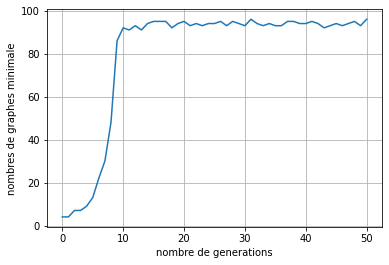

In [ ]:
import matplotlib.pyplot as plt


num_sol_maps = 100;
num_nodes = 10;
num_edges = 9;
num_generations = 50;

sp_graphs = lit_maps(num_sol_maps, num_nodes, num_edges); 
#print(graph_to_list(starting_pop))

#print(sp_graphs)

generations = [0]

minimal = [check_fitness_min(sp_graphs)];
#print("initial", check_fitness_min(sp_graphs))


for i in range(num_generations):
    
    #SELECTION
    best = select_48_best(sp_graphs)
    np.random.shuffle(best)


    #REPRODUCTION
    #Here are 48 'enfants' from the best 48 individuals using crossing over
    crossed = next_gen(best)
    

    #MUTATION
    #Randomly take 4 from and mutate them from the previous generation
    mutate = mutates_4_ind(sp_graphs)
    
    
    #Add all the populations together
    sp_graphs = best + crossed + mutate

    np.random.shuffle(sp_graphs)
    
    #print("loop", i + 1, check_fitness_min(sp_graphs))
    
    minimal.append(check_fitness_min(sp_graphs))
    generations.append(i + 1)
    
#print("min", minimal)
#print("gen", generations)
    
    
plt.plot(generations, minimal)
plt.xlabel('nombre de generations')
plt.ylabel('nombres de graphes minimale')
plt.grid()

### Complexité de l'algorithme

La complexité de l'algorithme génétique est donc la (nombre de générations)*[O(R) + O(RN) + O(RN) + O(R) + O(4)] = nombre de générations(O(RN)) donc la complexité total est O(n^2). 

Au moment, nous avons suivi la guide de la fiche qui nous ont dit de commencer avec 100 graphes et de trouver les 48 meilleurs individuals. Pour le futur, ca sera bien si nous pouvons généraliser pour plusiers graphes. Aussi, nous pouvons seulement utiliser notre algorithme quand le nombre de sommets N est pair parce-que nous avons en besoin quand nous divisons les graphes en deux pendant le crossing over. Pour le futur, nous pouvons désigner une systeme où on divise les graphes au hasard. Ca sera intérresant de voir comment ca change nos résultats.


## Algorithme partant d'un graphe completement allumé 

Une idée d'algorithme consiste en commencer avec un graph completment allumé, qui nous assure d'avoir un graphe éclairé au départ et d'enlever des lampadaire de façon heuristique pour conserver un éclairage jusqu’à tomber sur un éclairage minimal.

Tant que l'éclairage n'est pas minimale on choisi un élement par hasard parmi les sommets allumés et on l'éteint. Si cette action rendre le graph dans l'obsucirté on va reallumer le sommet.

In [ ]:
def simple_search(g):
  while g.is_min_lit() == 0:
      r = random.choice(list(g.vert_dict.keys())) 
      if g.vert_dict[r].light == 1:     
          g.vert_dict[r].light =0
      if g.is_lit() == 0:
          g.vert_dict[r].light = 1
  return g


In [ ]:
gr1 = con_graf(200,400)
gr1.switch_graph_on()
gr1.how_many_lights()

200

In [ ]:
simple_search(gr1)
gr1.how_many_lights()

124

#### Compléxité
A cause du hasard, il n'est pas facile d'éstimer la complexité.

g.is_min_lit est O(N²). Le nombre d'itération peuvent être très élevé, même factoriel, car chaque fois quand on choisit un sommet on a $N_a$ possibilités, où $N_a$ est le nombre de sommets allumés. Lorsque nous trouvons les somments que nous pouvons éteindre $N_a$ devient plus petit.

Nous avons vu précedement que la probabilité d'engendrer une graph éclairer est presque 0, même pour un graph avec 10 sommets et 30 arêtes. La probabilité de tomber sur un tel solution ne peut pas être élevé. On éstime que la complexité est d'ordre O(N!) ou O(exp(N)).

Nous allons voire comment rendre cette méthode beaucoup plus convenable en uitilisant des informations que nous connaisons sur le problème.

Nous pouvons apporter des modifications qui réduiront beaucoup le temps et donneront de meilleures solutions (moins de lampadaires).

Tout d'abord, observez que les sommets mieux connectés éclaircissent plus d'arêtes. On va distribuer une probabilité de manière à préférer éteindre les sommets relativement mal connectés. De plus, nous avons montré que chaque solution optimale peut avoir ses feuilles éteints. Nous allons donc les éteindre au debut.

Une information très important se cache dans la méthode de vérifier si le graphe est éclairé d'une manière minimale. Si le graphe est éclairer elle va éteindre les sommets allumés un par un jusqu'a elle trouve un lampadaire superflu(si éteint, l'éclairage ne change pas). Qui est éxactement le type de lampadaire que nous voulons enlever. Observer la différence entre les deux méthodes.

def is_min_lit(self):
        #enlever un lampadaire plonge au moins une rue dans l'obscurite
        if self.is_lit() == 0:
            return 0
        ok = 1
        for node in self.vert_dict.keys():
            if self.vert_dict[node].light == 1:
                self.switch_off(node)
                if self.is_lit() == 1:
                    ok = 0
                self.switch_on(node)
        return ok

def is_min_lit_special(self):

        #enlever un lampadaire plonge au moins une rue dans l'obscurite
        if self.is_lit() == 0:
            return 0

        for node in self.vert_dict.keys():
            if self.vert_dict[node].light == 1:
                self.switch_off(node)
                if self.is_lit() == 1:
                    return 0
                self.switch_on(node)
        return 1

La première laisse le graphe inchangé.

La deuxieme éteint le premiére lampadaire superflu trouvé, qui va beaucoup accéleré notre récherche. De plus, nous allons observer une amelioration de la qualité des graphes minimaux trouvés.

In [ ]:
def search_min(g):
    adj_dic = {}
    ##counting the edges each node has to help define our probability distribution
    ## taking into account the minimum, average and maximum number of connections
    M = 0
    m = 10**1000
    S = 0
    j = 0
    for i in g.vert_dict.keys():
        l = len(g.vert_dict[i].adjacent)
        adj_dic[i] = l
        if l > M:
            M = l
        if l < m:
            m = l
        S = S + l
        j+=1
        
        if len(g.vert_dict[i].adjacent) == 1:
            g.vert_dict[i].light = 0
    
    Avg = S/j

    ##accounting for the case where Avg == m == Max
    ## this is the case when the all nodes have the same number of connections
   
    if Avg == m:
        while g.is_min_lit_special() == 0:
            r = random.choice(list(g.vert_dict.keys())) 
            if g.vert_dict[r].light == 1:
                if adj_dic[r] <= Avg:
                    # proba = 0.1 + 0.4/Avg-m (x-m)
                    if random.random() >0.1 + (0.4/(Avg-m +1))*(adj_dic[r]-m):
                        g.vert_dict[r].light =0
              
        
            if g.is_lit() == 0:
                g.vert_dict[r].light = 1
        
    #### the general case now

    while g.is_min_lit_special() == 0:
        r = random.choice(list(g.vert_dict.keys())) 
        if g.vert_dict[r].light == 1:
            if adj_dic[r] <= Avg:
                # proba = 0.1 + 0.4/Avg-m (x-m)
                if random.random() >0.1 + (0.4/(Avg-m))*(adj_dic[r]-m):
                    g.vert_dict[r].light =0
            elif adj_dic[r] > Avg:
                #proba = 0.5 + 0.4/(M-Avg) (x-Avg)
                if random.random() > 0.5 + ((0.4)/(M-Avg))*(adj_dic[r]- Avg):
                    g.vert_dict[r].light = 0
        
        if g.is_lit() == 0:
            g.vert_dict[r].light = 1
            
    return g



gr1 est un graphe avec 200 sommets et 400 arêtes qui on a défini au dessus. Dans ce qui suit on engendra des graph de tailles differentes pour comparer les deux fonctions 'simple_search' et 'search_min'. On utilise la méthode switch_graph_on afin d'allumer tous les lampadaire, la méthode how_many_lights pour vérifier combien de lampadaires sont allumés. 

In [ ]:
gr1.switch_graph_on()
gr1.how_many_lights()

200

In [ ]:
search_min(gr1)
print(gr1.how_many_lights())

121


Dans les cellules suivantes, nous calculons les temps d'exécution de nos deux méthodes pour des graphes de tailles différentes. Ensuite, nous afficherons les comparaisons de temps.

In [ ]:
gr2 = con_graf(500, 800)
gr2.switch_graph_on()
gr2.how_many_lights()

500

In [ ]:
import time

gr2.switch_graph_on()
start = time.time()
search_min(gr2)
end = time.time()
T1 = end - start 
print(end - start)


5.468322277069092


In [ ]:
gr2.switch_graph_on()
start2 = time.time()
simple_search(gr2)
end2 = time.time()
T2 = end2 - start2
print(end2 - start2)

195.41065430641174


In [ ]:
gr3 = con_graf(100, 300)
gr3.switch_graph_on()
gr4 = con_graf(300, 600)
gr4.switch_graph_on()

In [ ]:


gr3.switch_graph_on()
start = time.time()
search_min(gr3)
end = time.time()
T_gr3_1 = end - start 
print(end - start)


0.09091305732727051


In [ ]:
import time

gr3.switch_graph_on()
start = time.time()
simple_search(gr3)
end = time.time()
T_gr3_2 = end - start 
print(end - start)


1.4412338733673096


In [ ]:
gr4.switch_graph_on()
start = time.time()
search_min(gr4)
end = time.time()
T_gr4_1 = end - start 
print(end - start)

1.7306714057922363


In [ ]:
gr4.switch_graph_on()
start = time.time()
simple_search(gr4)
end = time.time()
T_gr4_2 = end - start 
print(end - start)

48.15314269065857


### Comparaison de temps

La difference de temps est impressionant

In [ ]:


print('La comparaison de temps pour un graphe avec', gr3.num_vertices,'sommets et',len(gr3.edges), 'arêtes')
print('Le temps pour la méthode simple:',T_gr3_2,'s', 'vs', T_gr3_1,'s','pour la méthode améliorée')
print()
print('La comparaison de temps pour un graphe avec', gr4.num_vertices,'sommets et',len(gr4.edges), 'arêtes')
print('Le temps pour la méthode simple:',T_gr4_2,'s', 'vs', T_gr4_1,'s','pour la méthode améliorée')
print()
print('La comparaison de temps pour un graphe avec', gr2.num_vertices,'sommets et',len(gr2.edges), 'arêtes')
print('Le temps pour la méthode simple:',T2,'s', 'vs', T1,'s','pour la méthode améliorée')



La comparaison de temps pour un graphe avec 100 sommets et 300 arêtes
Le temps pour la méthode simple: 1.4412338733673096 s vs 0.09091305732727051 s pour la méthode améliorée

La comparaison de temps pour un graphe avec 300 sommets et 600 arêtes
Le temps pour la méthode simple: 48.15314269065857 s vs 1.7306714057922363 s pour la méthode améliorée

La comparaison de temps pour un graphe avec 500 sommets et 800 arêtes
Le temps pour la méthode simple: 195.41065430641174 s vs 5.468322277069092 s pour la méthode améliorée


### Estimer la complexité d'algorthme amélioré

Nous avons éstimé que la complexité de vérifier si une solution est minimale est O(RN) ou R est le nombre d'arêtes et N le nombre de sommets. Nous éstimons d'abord que la complexité de notre algorthme amélioré est O(RN²)

Nous allons comparer le temps du algorithm avec un algoritm O(N^3), par example 3 boucle for.

In [ ]:
start = time.time()
for i in range(600):
    for i in range(600):
        for i in range(600):
            2*2
end = time.time()
T_for = end - start 
print('un temps O(N**3) pour N =600 est', end - start)

un temps O(N**3) pour N =600 est 7.368931531906128


In [ ]:
test = con_graf(600,900)
test.switch_graph_on()
start = time.time()
search_min(test)
end = time.time()
T_test = end - start 
print('temps de la méthode', end - start)

if test.is_min_lit() == 1:
  print('Le graphe de 600 sommets et 900 arêtes est éclairé avec', test.how_many_lights(), 'lampadaires' )


temps de la méthode 7.355985879898071
Le graphe de 600 sommets et 900 arêtes est éclairé avec 320 lampadaires


### Approcher une solution optimale

Nous allons utiliser l'algorithme améliorée pour approximer une solution optimale. D'abord on calcule plusieure solutions minimale et garde la solution avec le plus petit nombre de lampadaire. 

In [ ]:
def search_opt(g):
    nr_list = []
    for i in range(200):
        search_min(g)
        nr_list.append(g.how_many_lights())
        g.switch_graph_on()
    return min(nr_list)

### Une relation identifiée

En essayant de miex comprendre les solutions minimales et optimales nous avons remarqué une dépendece interrésante entre le nombre de sommets, le nombre moyen de connexions de chaque sommets et le nombre de lampadaires allumés dans une solution proche d'une solution optimale.



In [ ]:
def search_min_plot(g):
    adj_dic = {}
    ##counting the edges each node has
    M = 0
    m = 10**1000
    S = 0
    j = 0
    for i in g.vert_dict.keys():
        l = len(g.vert_dict[i].adjacent)
        adj_dic[i] = len(g.vert_dict[i].adjacent)
        if l > M:
            M = l
        if l < m:
            m = l
        S = S + l
        j+=1
        
        if len(g.vert_dict[i].adjacent) == 1:
            g.vert_dict[i].light = 0
    
    Avg = S/j
    # print('avg = ', Avg)
    # print('m=',m)
    # print('M=',M)
    if Avg == m:
        while g.is_min_lit_special() == 0:
            r = random.choice(list(g.vert_dict.keys())) #complexity???? O(n)
            if g.vert_dict[r].light == 1:
                if adj_dic[r] <= Avg:
                    # p = 0.1 + 0.4/b-a (x-a)
                    if random.random() >0.1 + (0.4/(Avg-m +1))*(adj_dic[r]-m):
                        g.vert_dict[r].light =0
                # elif adj_dic[r] > Avg:
                #     #p = 0.5 + 0.4/(c-b) (x-b)
                #     if random.random() > 0.5 + ((0.4)/(M-Avg))*(adj_dic[r]- Avg):
                #         g.vert_dict[r].light = 0
        
            if g.is_lit() == 0:
                g.vert_dict[r].light = 1
        
    
    while g.is_min_lit_special() == 0:
        r = random.choice(list(g.vert_dict.keys())) #complexity???? O(n)
        if g.vert_dict[r].light == 1:
            if adj_dic[r] <= Avg:
                # p = 0.1 + 0.4/b-a (x-a)
                if random.random() >0.1 + (0.4/(Avg-m))*(adj_dic[r]-m):
                    g.vert_dict[r].light =0
            elif adj_dic[r] > Avg:
                #p = 0.5 + 0.4/(c-b) (x-b)
                if random.random() > 0.5 + ((0.4)/(M-Avg))*(adj_dic[r]- Avg):
                    g.vert_dict[r].light = 0
        
        if g.is_lit() == 0:
            g.vert_dict[r].light = 1
          
    
    
    
    return g, Avg, g.how_many_lights()

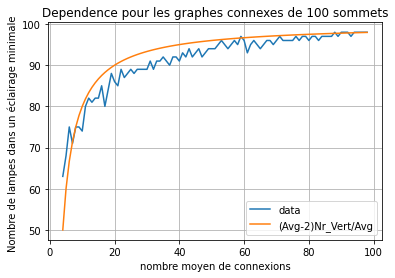

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_sol(V):
    X = []
    Y = []
    for i in range(2*V, (V-1)*V//2, V//2 ):
        gr = con_graf(V, i)
        gr.switch_graph_on()
        X.append(search_min_plot(gr)[1])
        Y.append(search_min_plot(gr)[2])
        
    return X,Y

V = 100

t = np.array(plot_sol(V)[0])
s = np.array(plot_sol(V)[1])



s1 =  (t-2)*V/t  #1 + np.sin(2 * np.pi * t)


s2 = (t-1.2)*V/t

fig, ax = plt.subplots()
ax.plot(t, s, label = 'data')
ax.plot(t,s1, label = '(Avg-2)Nr_Vert/Avg')
#ax.plot(t,s2, label = '(Avg-2)Nr_Vert/Avg')


ax.set(xlabel='nombre moyen de connexions', ylabel='Nombre de lampes dans un éclairage minimale ',
       title='Dependence pour les graphes connexes de 100 sommets')
ax.grid()

fig.savefig("test.png")
plt.legend()
plt.show()
